In [26]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import scipy.integrate
from sympy import integrate, conjugate, pi, oo, sin , cos
from sympy import Symbol

In [27]:
N = 5
psi0 =(fock(N,0))
a = destroy(N)
c = a.dag()

phi = phase(N,0)
cos_phi = phi.cosm()
sin_phi = phi.sinm()

commutator(sin_phi,cos_phi, kind = 'normal') #Commutator of sin and cos = 0, we have non-complimentary observables!

#expect(cos_phi**2,psi0) # very close to 1/2 which is what we expect.
#expect(sin_phi**2,psi0) # same for the sin^2 function.

i = complex(0,1)

annihilation = ((i*phi).expm())*((num(N)).sqrtm())
annihilation*fock(N,2) # returns sqrt(n) * (n-1)th state which is exactly what the annihilation operator should do
creation = ((num(N)).sqrtm())*((-i*phi).expm())
creation*fock(N,2) # this returns exactly what we would want a creation operator to as well

# Confident that this phase operator Phi has the properties that we would want from such an operator 
# We're using a Pegg-Barnett phase operator instead of SG phase operator.

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [1.73205081]
 [0.        ]]

C:\Users\NoahF\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


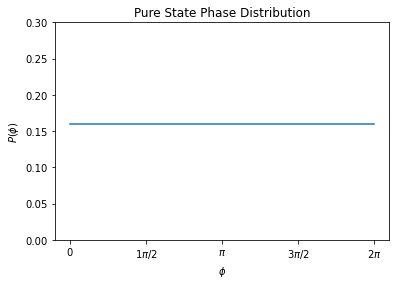

In [48]:
# Now we have confirmed that the phase operator Phi is what we want, lets move onto producing some plots!
# To do that we will need to construct the phase distribution function
phi_ith = []
Phase_Distribution = []
N = 5
i = complex(0,1)
phi = np.linspace ( 0 , 2* np.pi, 250)

for z in phi:
    phi_ith = []
    for n in range(0,N): # This will let us sum from n = [0, ... , N] i.e all energy levels
            for m in range(0,N): # This lets us do the same but for m 
                m_ket = fock(N,m)
                n_bra = fock(N,n).dag()
                rho = fock_dm(N,0)
                exp_factor = np.exp( i * (m-n) * (z))
                x = ((2*np.pi) ** (-1)) * (n_bra * rho * m_ket) * (exp_factor)
                phi_ith.append(x)
    Phase_Distribution.append(np.array(phi_ith).sum())          
                
# This returns us a scalar value which is what we expect, we can then make this a scalar function of Phi A.K.A the phase distribution.


plt.title("Phase Distribution")
plt.xlabel(r'$ \phi $')
plt.ylabel(r'$P (\phi) $') 
tick_pos= [0, 0.5*np.pi ,np.pi ,1.5*np.pi, 2*np.pi]
labels = ['0','$1\pi/2$', '$\pi$','$3\pi/2$' ,'$2\pi$']
plt.xticks(tick_pos, labels)

plt.ylim(0,0.2)
plt.plot(phi , Phase_Distribution)

np.testing.assert_almost_equal(Phase_Distribution[1] * 2 * np.pi , 1) # This is a bit of a cheat as the phase distribution is a flat line 


#We can see that the "integral" of the phase distribution returns unity as expected
# Good that we can recreate the results in a pure state.
# Need to begin considering how we can extend the density operator rho and numerically integrate the resultant array List1 


C:\Users\NoahF\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


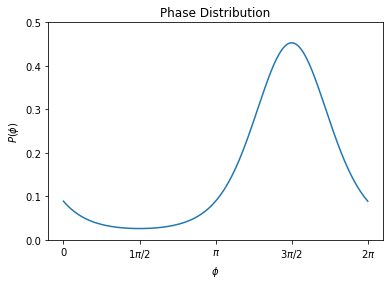

In [56]:
#Let's now recreate the phase distributions for the steady state behaviour of the various cases we saw earlier:
# Here we have recreated the phase distribution for the Quantum VdP with an external drive, Classical limit (k2 = 0.05*k1)
N = 30 
psi0 = basis(N,0)
a = destroy(N)

k1 = 1 
k2 = 0.05 * k1 
E = k1 
D = 0

H = D*(a.dag() * a) + (E/2)*(a + a.dag())
c1 = np.sqrt(2*k1) * a.dag()
c2 = np.sqrt(2*k2) * (a**2)
Collapse = [c1 , c2]


t0 = 0
t_max = 10
t_steps = 3000
t = np.linspace(t0,t_max,t_steps)


results = mesolve(H,psi0,t,Collapse)
rho_ss = results.states[(t_steps-1)]

Phase_Distribution_2 = []
phi_ith_2 = []
for z in phi:
    phi_ith_2 = []
    for n in range(0,N): # This will let us sum from n = [0, ... , N] i.e all energy levels
            for m in range(0,N): # This lets us do the same but for m 
                m_ket = fock(N,m)
                n_bra = fock(N,n).dag()
                rho = fock_dm(N,0)
                exp_factor = np.exp( i * (m-n) * (z))
                x = ((2*np.pi) ** (-1)) * (n_bra * rho_ss * m_ket) * (exp_factor)
                phi_ith_2.append(x)
    Phase_Distribution_2.append(np.array(phi_ith_2).sum()) 

    
plt.title("Phase Distribution")
plt.xlabel(r'$ \phi $')
plt.ylabel(r'$P (\phi) $') 
tick_pos= [0, 0.5*np.pi ,np.pi ,1.5*np.pi, 2*np.pi]
labels = ['0','$1\pi/2$', '$\pi$','$3\pi/2$' ,'$2\pi$']
plt.xticks(tick_pos, labels)

plt.ylim(0,0.5)
plt.plot(phi , Phase_Distribution_2)


C:\Users\NoahF\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


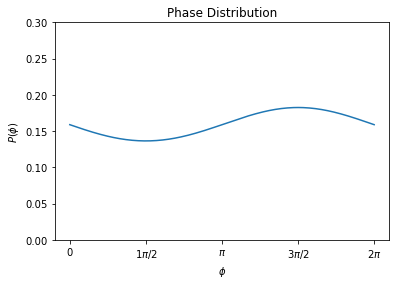

In [59]:
#This is the Quantum VdP Oscillator in the quantum limit ( k2  = 20 *k1)

N = 30
psi0 = basis(N,0)
a = destroy(N)

k1 = 1 
k2 = 20 * k1 
E = k1 
D = 0

H = D*(a.dag() * a) + (E/2)*(a + a.dag())
c1 = np.sqrt(2*k1) * a.dag()
c2 = np.sqrt(2*k2) * (a**2)
Collapse = [c1 , c2]


t0 = 0
t_max = 10
t_steps = 3000
t = np.linspace(t0,t_max,t_steps)


results = mesolve(H,psi0,t,Collapse)
rho_ss = results.states[(t_steps-1)]

Phase_Distribution_3 = []
phi_ith_3 = []
for z in phi:
    phi_ith_3 = []
    for n in range(0,N): # This will let us sum from n = [0, ... , N] i.e all energy levels
            for m in range(0,N): # This lets us do the same but for m 
                m_ket = fock(N,m)
                n_bra = fock(N,n).dag()
                rho = fock_dm(N,0)
                exp_factor = np.exp( i * (m-n) * (z))
                x = ((2*np.pi) ** (-1)) * (n_bra * rho_ss * m_ket) * (exp_factor)
                phi_ith_3.append(x)
    Phase_Distribution_3.append(np.array(phi_ith_3).sum()) 
    
plt.title("Phase Distribution")
plt.xlabel(r'$ \phi $')
plt.ylabel(r'$P (\phi) $') 
tick_pos= [0, 0.5*np.pi ,np.pi ,1.5*np.pi, 2*np.pi]
labels = ['0','$1\pi/2$', '$\pi$','$3\pi/2$' ,'$2\pi$']
plt.xticks(tick_pos, labels)

plt.ylim(0,0.3)
plt.plot(phi , Phase_Distribution_3)